In [1]:
from sklearn import svm, metrics
import glob, os.path, re, json

In [36]:
# text file을 읽어오고 단어 출현빈도를 조사하도록 만듬
def check_freq(fname):
    name = os.path.basename(fname)
    lang = re.match(r'^[a-z]{2,}', name).group()
    with open(fname, 'r', encoding='utf-8') as f:
        text = f.read()
    text = text.lower()
    cnt = [0 for n in range(0 , 26)]
    code_a = ord('a')
    code_z = ord('z')
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z:
            cnt[n-code_a] +=1
    total = sum(cnt)
    freq = list(map(lambda x: x/total, cnt))
    return(freq, lang)

def load_files(path):
    freqs = []
    labels = []
    file_list = glob.glob(path)
    for fname in file_list:
        row = check_freq(fname)
        freqs.append(row[0])
        labels.append(row[1])
    return{"freqs": freqs, "labels": labels}

data = load_files("./lang/train/*.txt")
test = load_files("./lang/test/*.txt")

# with open("freq.json", 'w', encoding='utf-8') as fp:
#     json.dump([data, test], fp)
    
clf = svm.SVC(gamma='scale')
clf.fit(data["freqs"], data["labels"])
pre = clf.predict(test['freqs'])
as_score = metrics.accuracy_score(test['labels'], pre)
cl_report = metrics.classification_report(test["labels"], pre)
print(cl_report)

              precision    recall  f1-score   support

          en       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         2
          id       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



<Figure size 1080x576 with 0 Axes>

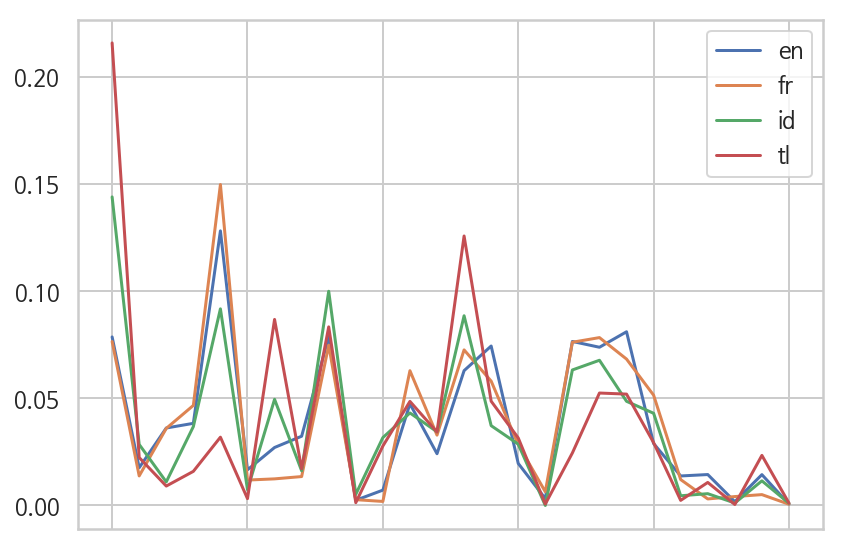

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import json
%matplotlib inline

with open("freq.json", "r", encoding="utf-8") as fp:
    freq = json.load(fp)

#그래프로 그릴 수 있게 각 언어의 알파벳 출현 빈도를 집계한다.
lang_dic = {}
for i, lbl in enumerate(freq[0]["labels"]):
    fq = freq[0]["freqs"][i] 
    if not (lbl in lang_dic):
        lang_dic[lbl] = fq
        continue
    for idx, v in enumerate(fq):
        lang_dic[lbl][idx] = (lang_dic[lbl][idx] + v) / 2

asclist = [[chr(n) for n in range(97,97+26)]] 
df = pd.DataFrame(lang_dic, index=asclist) 
df.plot(kind="line")
plt.savefig("lang-plot1.png")
plt.tight_layout()